# Ejercicio 01
En este notebook, se buscará aplicar filtros promediadores o pasabajos de diferentes tamaños a una imagen, y analizar qué efecto tiene sobre una imagen este tipo de filtrado.

## Cargando la imagen y visualizándola

In [9]:
import matplotlib.pyplot as plt

In [10]:
import cv2

In [11]:
# Read the image from the file system
image = cv2.imread('../resources/character_patterns.tif', cv2.IMREAD_GRAYSCALE)

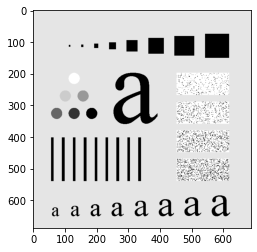

In [12]:
# Plot the image
plt.imshow(image, cmap='gray')
plt.show()

# Filtrado de la imagen

In [13]:
import numpy as np

In [29]:
# Declare the sizes of kernel to be used when filtering
kernel_sizes = [3, 5, 9, 15, 25, 35, 45, 55]

In [30]:
# Apply each kernel and store the filtered image
filtered_images = np.zeros((len(kernel_sizes), image.shape[0], image.shape[1]))
for i, kernel_size in enumerate(kernel_sizes):
    
    # Create the kernel with the appropriate size and normalize it
    kernel = np.ones((kernel_size, kernel_size), dtype=np.float32)
    kernel /= kernel.sum()
    
    # Apply the filter
    filtered_images[i,:,:] = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)

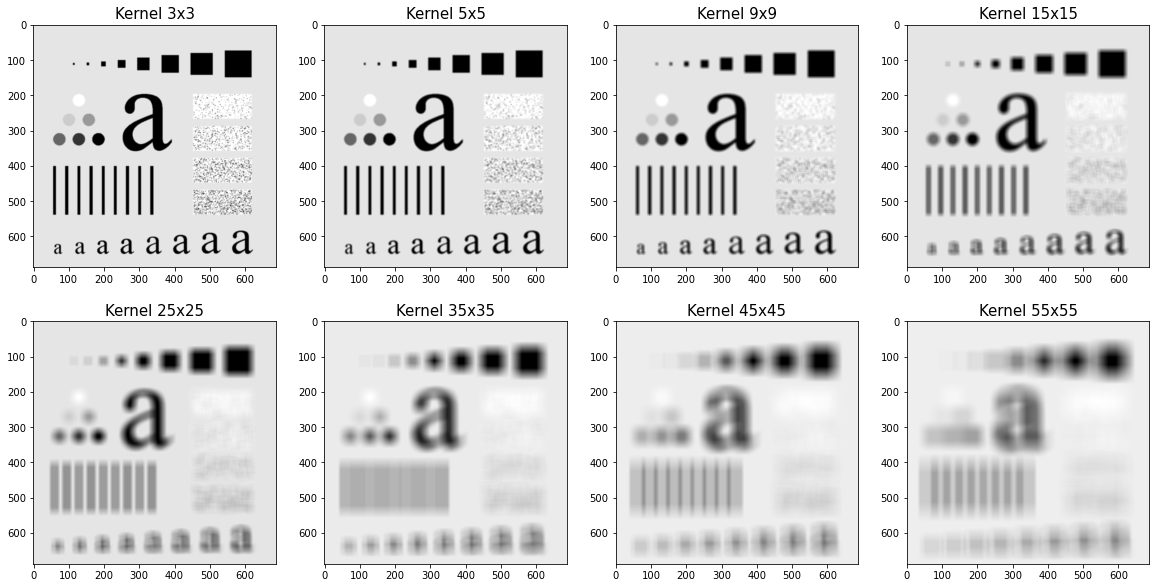

In [31]:
# Plot the images
fig, ax = plt.subplots(2, len(filtered_images) // 2, figsize=(20, 10))
for i, filtered_image in enumerate(filtered_images):
    
    # Plot individual image
    ax.flatten()[i].set_title(f'Kernel {kernel_sizes[i]}x{kernel_sizes[i]}', fontsize=15)
    ax.flatten()[i].imshow(filtered_image, cmap='gray')

# Show the plot
plt.show()

# Análisis de resultados
Un **kernel** o **máscara** permite definir un filtro en dos dimensiones, es decir, un filtro espacial. Se crearon filtros pasabajos, promediadores, de diferentes tamaños y se aplicó la máscara a la imagen original.

En primer lugar, la imagen se observa más borrosa o difuminada luego del filtrado, esta sensación está asociada a una pérdida de resolución o nivel de detalle en la imagen. Esto se debe a que el filtro pasabajos remueve las altas frecuencias espaciales, es decir, elimina las transiciones o cambios abruptos en la imagen. Por otro lado, a medida que se aumenta el tamaño de la máscara, el efecto es mayor. Esto se debe a que cuanto mayor es el tamaño del filtro, menos ancho de banda posee su espectro de amplitudes, provocando que sólo sobrevivan frecuencias más bajas. Entonces, el efecto se ve más enfatizado a medida que agrandamos el filtro.
Es de interés observar las rectas verticales de la imagen, que a medida que se alcanza un tamaño de máscara grande, dejan de ser distinguibles entre sí. Esta observación es un fuerte indicador de la pérdida de resolución espacial en la imagen.

En segundo lugar, si se observa la región de la imagen donde hay una nube de puntos con dispersión aleatoria, se nota que a medida que se filtra con mayor tamaño, tiende a convertirse en una región sólida de un único color. Esto se debe a que, como se indicó anteriormente, se están removiendo las altas frecuencias, y con ellas las transiciones abruptas que pueden estar presentes en el ruido.